In [59]:
import shapely
from shapely.geometry import Point, Polygon, LineString, GeometryCollection, MultiPolygon
import numpy as np
from shapely import wkt

In [22]:
pt = Point(100, 10)
pt1 = Point(150, 10)
pt.distance(pt1)
pt.x
pt.y
pt.xy

(array('d', [100.0]), array('d', [10.0]))

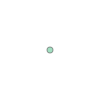

In [12]:
wkt.loads(str(pt))

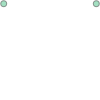

In [17]:
GeometryCollection([pt, pt1])

In [30]:
ln = LineString([(0, 1), (100, 3), (50, -100)])
ln
list(ln.coords)
list(ln.xy[0])  # x coords
list(ln.xy[1])  # y coords
ln.project(pt)

100.0199980003999

In [31]:
list(ln.interpolate(ln.project(Point(1,1))).coords)

[(0.9996001599360257, 1.0199920031987204)]

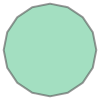

In [52]:
poly = Polygon([(0,0), (0,1), (1,1), (1,0)])
poly
poly.contains(Point(0.7, 0.7))
pt2 = Point(0.7, 0.7).buffer(1, resolution=4)
#print(pt2)
len(np.array(pt2.exterior))
pt2

In [60]:
Point(10,10).buffer(10).bounds

(0.0, 0.0, 20.0, 20.0)

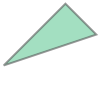

In [68]:
x = Point(10,10).buffer(10).bounds
Polygon([(0.0, 0.0), (20.0, 20.0), (30, 10)])

<ipython-input-81-f5b8495a01df>:243: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = [(a-min(x1.astype(np.float)))*C for a in x1.astype(np.float)]
<ipython-input-81-f5b8495a01df>:244: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = [-(b-min(y1.astype(np.float)))*C for b in y1.astype(np.float)]
<ipython-input-81-f5b8495a01df>:245: Depr

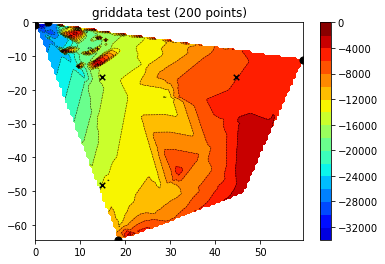

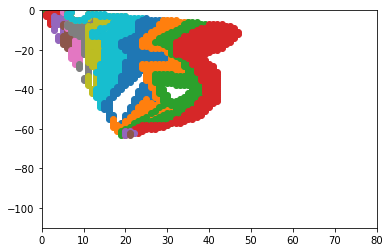

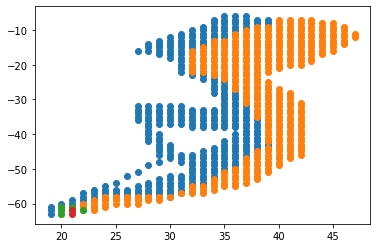

[19, 19, 19, 20, 20, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35,

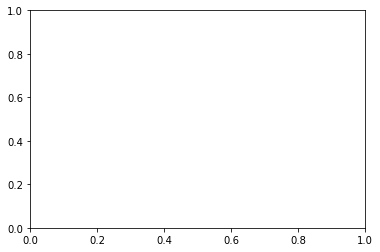

In [81]:
import os, sys
import csv
current_dir = os.getcwd()
sys.path.append(current_dir)
os.chdir('C:/Users/giorg/Desktop/Trento/Meccatronica/TESI/Progress/Github repositories/wt_darkvessel-motion-planning-6aed3242f2f8_originale')
import numpy as np
import matplotlib.tri as tri
import mahotas
from scipy.interpolate import griddata
from scipy import interpolate
import matplotlib
import matplotlib.pyplot as plt
import math
import time
from scipy.interpolate import interp1d
from statistics import mode
from a_star import main_Astar
from potential_field import main_POT

threshold = 6000
ngridx = 100
ngridy = 100
npts = 200
C = 6378137*(math.pi/180)

def transform(x_coords, y_coords, angle, sx, sy):
	new_x = []
	new_y = []
	
    #for i in range(1, len(x_coords)):
	new_x.append(math.cos(angle)*x_coords + math.sin(angle)*y_coords+sx)
	new_y.append(-math.sin(angle)*x_coords + math.cos(angle)*y_coords+sy)
		
	return new_x, new_y 

def design_plot_sin(xi, yi, xobs, yobs):
    
    newxx = []
    newyy = []
    Fs = 8000
    f = 5000
    sample = 100
    x = np.arange(0,20*np.pi,20*np.pi/100)
    y = 3*np.sin(2 * np.pi *f * x/Fs)
    y[-1]=0.0
    
    for i in range(1, len(xi)):
        j = i-1
        ang = -math.atan2(abs(yi[i]-yi[j]), abs(xi[i]-xi[j]))
        tmpx, tmpy = transform(0, y[j], ang, xi[j], yi[j])
        newxx.append(tmpx)
        newyy.append(tmpy)
        if i == len(xi)-1:
            j = i
            tmpx, tmpy = transform(0, y[j], ang, xi[j], yi[j])
            newxx.append(tmpx)
            newyy.append(tmpy)


    plt.plot(newxx, newyy)
    plt.plot(xi, yi)
    plt.plot(xobs, yobs, 'x')
    plt.show()
    
    return newxx, newyy

def interp_traj(x, y, sm_par):
    tck,u=interpolate.splprep([x,y],s=sm_par)
    x_i,y_i= interpolate.splev(np.linspace(0,1,100),tck)
    return x_i, y_i

def plot_interp_traj(x, y, sm_par, name_plot):
    plt.plot(x, y, 'o-')
    xi, yi = interp_traj(x, y, sm_par)
    plt.plot(xi, yi)
    plt.title(name_plot)
    plt.grid()
    plt.show()
    return xi, yi

def dist_pts(x1, y1, x2, y2):
    dist = math.sqrt((x1-x2)**2 + (y1-y2)**2)
    return dist

def create_obstacle(obs_x, obs_y, r):
    circ = []
    for an in range(0, 13):
        circ.append(2*an*math.pi/12)

    for i in range(0, len(obs_x)):
        for j in circ:
            obs_x.append(obs_x[i] + r*math.cos(j))
            obs_y.append(obs_y[i] + r*math.sin(j))
            
    return obs_x, obs_y

def calc_thresh(met, length):
    thresh = length-int(met/2)-1
    return thresh

'''
def new_obstacles(cs, tt):
    p, points_polys = fill_poly(cs)
    thr = calc_thresh(tt, len(points_polys))
    obs_x = []
    obs_y = []
    for i in range(len(points_polys)):
        if i > thr:
            plt.scatter(points_polys[i][0], points_polys[i][1])
            for j in range(0, len(points_polys[i][0])):
                obs_x.append(points_polys[i][0][j])
                obs_y.append(points_polys[i][1][j])

    plt.show()
    return obs_x, obs_y
'''

def new_obstacles(cs, tt):
    p,points_polys = fill_poly(cs)
    thr = calc_thresh(tt, len(points_polys))
    obs_x = []
    obs_y = []
    for i in range(len(points_polys)):
        if i > thr:
            plt.scatter(points_polys[i][0], points_polys[i][1])
            for j in range(0, len(points_polys[i][0])):
                obs_x.append(points_polys[i][0][j])
                obs_y.append(points_polys[i][1][j])

    plt.show()
    return obs_x, obs_y

def plot_map(X, Y, D, i, IP_x, IP_y, c_x, c_y):
    
    xi = np.linspace(min(X), max(X), ngridx)
    yi = np.linspace(min(Y), max(Y), ngridy)
    xi_t = np.linspace(min(IP_x), max(IP_x), ngridx)
    yi_t = np.linspace(min(IP_y), max(IP_y), ngridx)
    zi = griddata((X, Y), D, (xi[None,:], yi[:,None]), method='linear')
        
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    CS.set_clim(min(D), max(D))
    plt.colorbar() # draw colorbar
    #plt.scatter(X,Y,marker='o',c='white',s=5)
    plt.scatter(c_x, c_y,marker='o',c='black',s=50)
    plt.scatter(IP_x,IP_y,marker='x',c='black',s=30) #?
    plt.xlim(min(X), max(X))
    plt.ylim(min(Y), max(Y))
    plt.title('griddata test (%d points)' % npts)
    plt.show()
    return CS

def render(poly_old):
    """Return polygon as grid of points inside polygon.

    Input : poly (list of lists)
    Output : output (list of lists)
    """
    poly = []
    for i in poly_old:
        poly.append([int(i[0]), int(i[1])])
    
    xs, ys = zip(*poly)
    minx, maxx = min(xs), max(xs)
    miny, maxy = min(ys), max(ys)

    newPoly = [(int(x - minx), int(y - miny)) for (x, y) in poly]

    X = maxx - minx + 1
    Y = maxy - miny + 1

    grid = np.zeros((X, Y), dtype=np.int8)
    mahotas.polygon.fill_polygon(newPoly, grid)

    return [(x + minx, y + miny) for (x, y) in zip(*np.nonzero(grid))]

def fill_poly(cs):
    points_polys = []
    polys = []
    xxx = []
    yyy = []
    for i in range(0, len(cs.allsegs)-1):
        dat0= cs.allsegs[i][0]
        #plt.scatter(X,Y,marker='o',c='black',s=5)
        #plt.plot(dat0[:,0],dat0[:,1])
        x, y = zip(*render(dat0))
        points_polys.append([x, y])
        plt.scatter(x, y)
        xxx.append(x)
        xxx.append(y)
        x, y = zip(*dat0)
        polys.append([x, y])
        #plt.plot(x, y, c="r")
        plt.xlim(0, 80)
        plt.ylim(-110, 0)
        
     
    #print('111111111111111111')
    #print(xxx)
    #print('222222222222222222')
    #print(yyy)
    plt.show()

    return polys, points_polys

def main_CP():
    x = []
    y = []
    d = []
    
    x_obs = []
    y_obs = []
    obstacles = []
    inde = []
    
    """with open('my_data-6.csv', newline = '') as file:
        reader = csv.reader(file, delimiter = ';')
        for row in reader:
            if row[2] != ' undefined':
                x.append(row[0])
                y.append(row[1])
                d.append(row[2]) 
    with open('my_data-9.csv', newline='') as f:
        reader=csv.reader(f, delimiter=';')
        for row in reader:
            if row[2]!=' undefined' :
                x.append(row[0])
                y.append(row[1])
                d.append(row[2])"""
    with open('my_data-15.csv', newline='') as f:
        reader=csv.reader(f, delimiter=';')
        for row in reader:
            if row[2]!=' undefined' :
                x.append(row[0])
                y.append(row[1])
                d.append(row[2])
                
    x1=np.array(x)
    y1=np.array(y)
    d1=np.array(d)
    
    X = [(a-min(x1.astype(np.float)))*C for a in x1.astype(np.float)]
    Y = [-(b-min(y1.astype(np.float)))*C for b in y1.astype(np.float)]
    D = -d1.astype(np.float)
    
    # Center of the map
    center_x = (max(X)-min(X))/2  
    center_y = -(max(Y)-min(Y))/2
    
    IP_x = np.array([center_x-center_x/2, center_x-center_x/2, center_x+center_x/2])
    IP_y = np.array([center_y+center_y/2, center_y-center_y/2, center_y-center_y/2])
    IP_GPS = [(a-min(x1.astype(np.float)))*C for a in x1.astype(np.float)]
    
    # Corners of the map
    j = 0
    corner_x = []
    corner_y = []
    counter = [0,0,0,0]
    for ind_cor in X:
        if ind_cor == min(X) and counter[0] == 0:
            #print('min_x' + str(j))
            corner_x.append(ind_cor)
            corner_y.append(Y[j])
            counter[0] = 1
        if Y[j] == min(Y) and counter[1] == 0:
            #print('min_y' + str(j))
            corner_x.append(ind_cor)
            corner_y.append(Y[j])
            counter[1] = 1
        if ind_cor == max(X) and counter[2] == 0:
            #print('max_x' + str(j))
            corner_x.append(ind_cor)
            corner_y.append(Y[j])
            counter[2] = 1
        if Y[j] == max(Y) and counter[3] == 0:
            #print('max_y' + str(j))
            corner_x.append(ind_cor)
            corner_y.append(Y[j])
            counter[3] = 1
            
        j = j+1
    
    index = []
    for i in range(0, len(corner_x)):
        index.append(0)
    
    j = 0
    tmp_corner_x = [62.39457458950221, 76.34661743596075, 76.34661743596075, 18.479035472486686, 0.0]
    tmp_corner_y = [-0.0, -20.594105796569192, -20.779638281349452, -104.8258538302531, -41.16965834491743]
    sx = 20.0  # [m]
    sy = -80.0  # [m]
    gx = 60.0  # [m]
    gy = -20.0  # [m]
    s1x = gx
    s1y = gy
    g1x = 10
    g1y = 45
	#sx = float(input("Give start x position: "))
    #sy = float(input("Give start y position: "))
    #gx = float(input("Give goal x position: "))
    #gy = float(input("Give goal y position: "))
    #x_obs_tmp, y_obs_tmp,x_HT, Hor_Traj = design_Horizontal(new_obs_x, new_obs_y,sx, sy, gx, gy)
    
    cs = plot_map(X, Y, D, inde, IP_x, IP_y, corner_x, corner_y)
    
    tOBS_X, tOBS_Y = new_obstacles(cs, 8)
    radius = 3
    x_obs = tOBS_X
    y_obs = tOBS_Y
    print(x_obs)
    print('--------')
    print(y_obs)
    #x_obs, y_obs = create_obstacle(tOBS_X, tOBS_Y, radius)
    '''
    i = 10.0
    tt = []
    while i > 2.0:
        start_time = time.time()
        #routx_pot, routy_pot = main_POT(sx, sy, gx, gy, x_obs, y_obs, tmp_corner_x, tmp_corner_y, i)
        tt.append((time.time() - start_time))
        print("--- %s seconds ---" % (time.time() - start_time))
        i = i - 0.75

    print(tt)
    '''
    start_time = time.time()
    routx_ast, routy_ast = main_Astar(sx, sy, gx, gy, tmp_corner_x, tmp_corner_y, x_obs, y_obs)
    print("--- %s seconds ---" % (time.time() - start_time))
    #return sx, sy, gx, gy, x_obs,y_obs, tmp_corner_x, tmp_corner_y
    '''
    print('-----------------')
    print('Potential Field: ')
    #for i in range(0, len(routx_pot)):
    #    print(routx_pot[i], routy_pot[i])
    
    print('-----------------')
    print('A star: ')
    #for i in range(0, len(routx_ast)):
    #    print(routx_ast[i], routy_ast[i])
        
    print('-----------------')
    print(routx_pot)
    print(routy_pot)
    print(routx_ast)
    print(routy_ast)
    '''
    #astxi, astyi = plot_interp_traj(routx_ast, routy_ast, 50.0, 'A star')
    #potxi, potyi = plot_interp_traj(routx_pot, routy_pot, 50.0, 'Potential')
    
    #sin_astx, sin_asty = design_plot_sin(astxi, astyi, x_obs, y_obs)
    #sin_potx, sin_poty = design_plot_sin(potxi, potyi, x_obs, y_obs)
#sx, sy, gx, gy, x_obs,y_obs, tmp_corner_x, tmp_corner_y = main_CP()
main_CP()

In [ ]:
"""plt.figure(4, figsize=(10, 7))
mp2 = Basemap(projection='merc',
             llcrnrlon=10.58675,  # 4.125, 10,  # -5.42,
             llcrnrlat=42.11383,  # 33.1875, 42
             urcrnrlon=11.68915,  # 20.291667938, 12
             urcrnrlat=42.78513,  # 45.97916,  42.7488
             resolution='l')

lon, lat = np.meshgrid(lons, lats)
x, y = mp2(lon, lat)

sx, sy = mp2(11.412532, 42.339683)  # starting point
gx, gy = mp2(11.106284, 42.504714)
plt.plot(oxland_, oyland_, ".g")
plt.plot(Cspacex_, Cspacey_, '.b')
plt.plot(sx, sy, "<k", markersize=10)
plt.plot(gx, gy, "Xr", markersize=10)
mp2.fillcontinents()
mp2.drawcoastlines()
mp2.drawstates()
mp2.drawcountries()

plt.show()"""